In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("laptop_price.csv", encoding='latin1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
df.shape

(1303, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [6]:
def columns_info(data):
    cols = []
    dtype=[]
    unique_v =[]
    n_unique_v =[]
    
    for col in df.columns:
        cols.append(col)
        dtype.append(data[col].dtypes)
        unique_v.append(data[col].unique())
        n_unique_v.append(data[col].nunique())
        
    return pd.DataFrame({"names": cols ,"dtypes" : dtype , "unique" : unique_v , "n_unique" : n_unique_v})

In [7]:
columns_info(df)

,names,dtypes,unique,n_unique
0,laptop_ID,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1303
1,Company,object,"[Apple, HP, Acer, Asus, Dell, Lenovo, Chuwi, M...",19
2,Product,object,"[MacBook Pro, Macbook Air, 250 G6, Aspire 3, Z...",618
3,TypeName,object,"[Ultrabook, Notebook, Netbook, Gaming, 2 in 1 ...",6
4,Inches,float64,"[13.3, 15.6, 15.4, 14.0, 12.0, 11.6, 17.3, 10....",18
5,ScreenResolution,object,"[IPS Panel Retina Display 2560x1600, 1440x900,...",40
6,Cpu,object,"[Intel Core i5 2.3GHz, Intel Core i5 1.8GHz, I...",118
7,Ram,object,"[8GB, 16GB, 4GB, 2GB, 12GB, 6GB, 32GB, 24GB, 6...",9
8,Memory,object,"[128GB SSD, 128GB Flash Storage, 256GB SSD, 51...",39
9,Gpu,object,"[Intel Iris Plus Graphics 640, Intel HD Graphi...",110


In [8]:
df.drop("laptop_ID",inplace = True , axis=1)

In [9]:
df["Company"].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

### Check Duplicated

In [10]:
df.duplicated().sum()

28

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

### visualization 

In [13]:
df['Price_euros'].min()

174.0

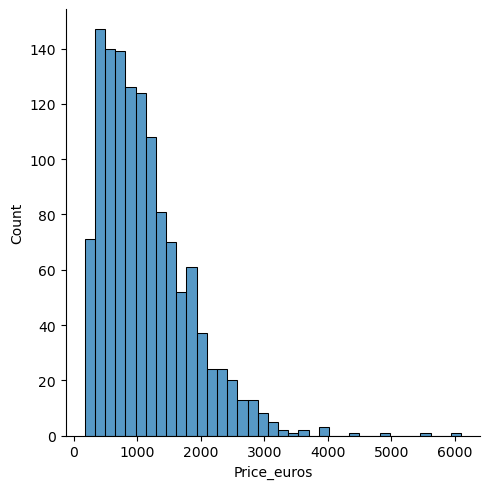

In [15]:
sns.displot(df['Price_euros'])

#### Most Laptops price in euros range from 174€ to 2800€ 

<Figure size 800x800 with 0 Axes>

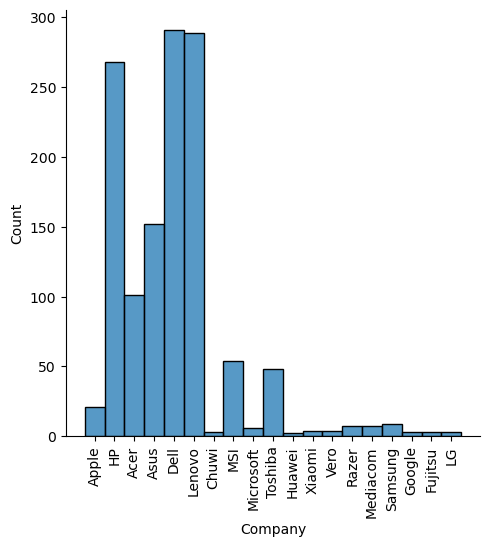

In [16]:
plt.figure(figsize=(8,8))
sns.displot(df['Company'])
plt.xticks(rotation=90)
plt.show()

#### Most Laptops Companies are Dell and Lenovo

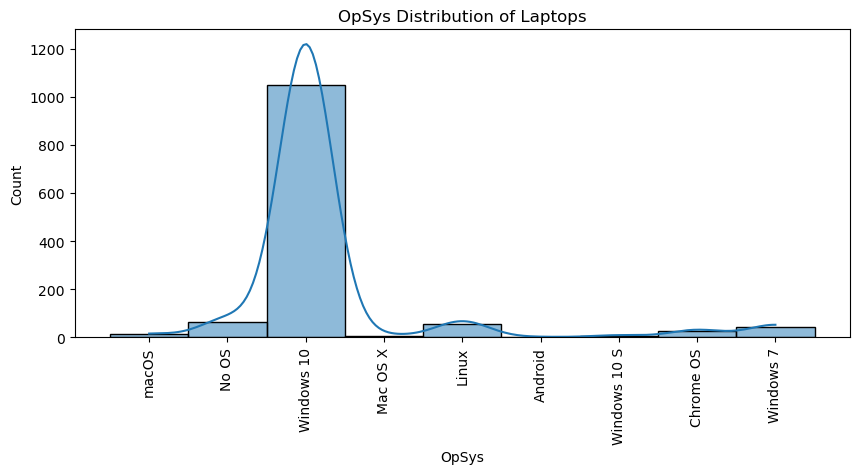

In [17]:
plt.figure(figsize=(10, 4))
sns.histplot(df['OpSys'],kde=True)
plt.title('OpSys Distribution of Laptops')
plt.xticks(rotation=90)
plt.xlabel('OpSys')
plt.show()

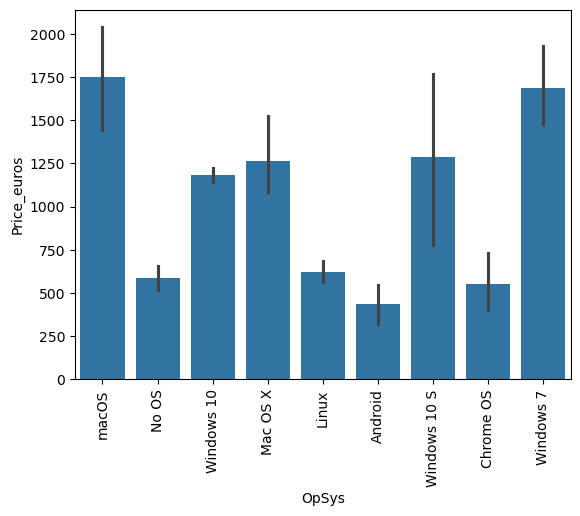

In [18]:
sns.barplot(x = df['OpSys'], y = df['Price_euros'])
plt.xticks(rotation=90)
plt.show()

### Most expensive is macOs

### Most Laptops have Windows 10 and from that we will find users prefer OpSys

<Axes: xlabel='Ram', ylabel='count'>

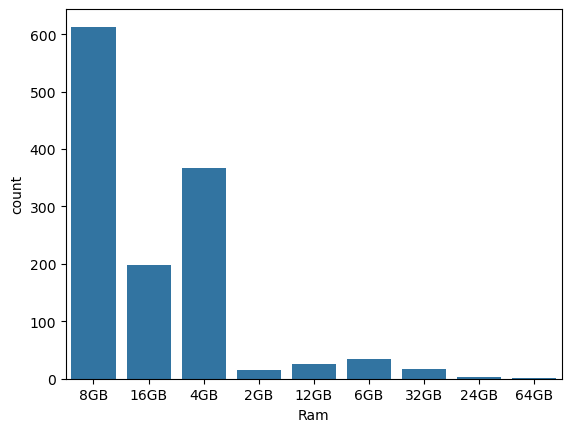

In [19]:
sns.countplot(x='Ram', data=df)

### Ram 8GB is perferct chooice cause people prefer that 

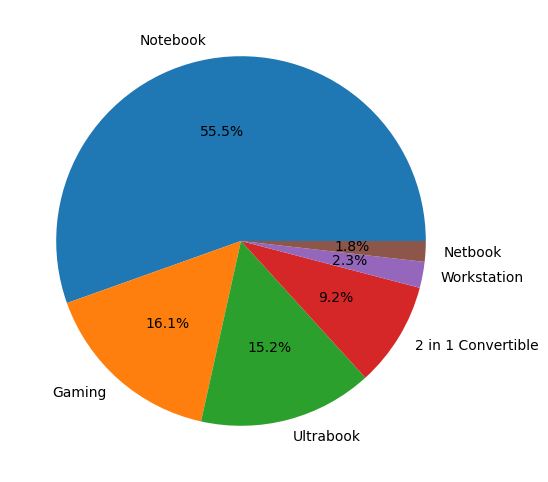

In [20]:
plt.figure(figsize=(6, 6))
type_counts = df['TypeName'].value_counts()
labels = type_counts.index
plt.pie(type_counts, labels=labels, autopct='%1.1f%%')
plt.show()

### Commen type is NoteBook

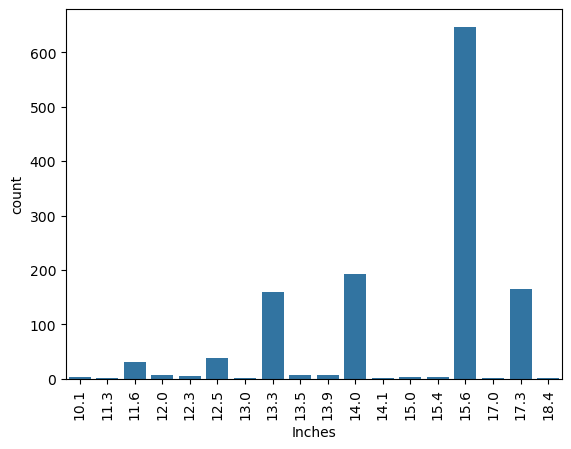

In [21]:
sns.countplot(x='Inches' ,  data=df)
plt.xticks(rotation=90)
plt.show()

## The perferct Inches in laptops is 15.6

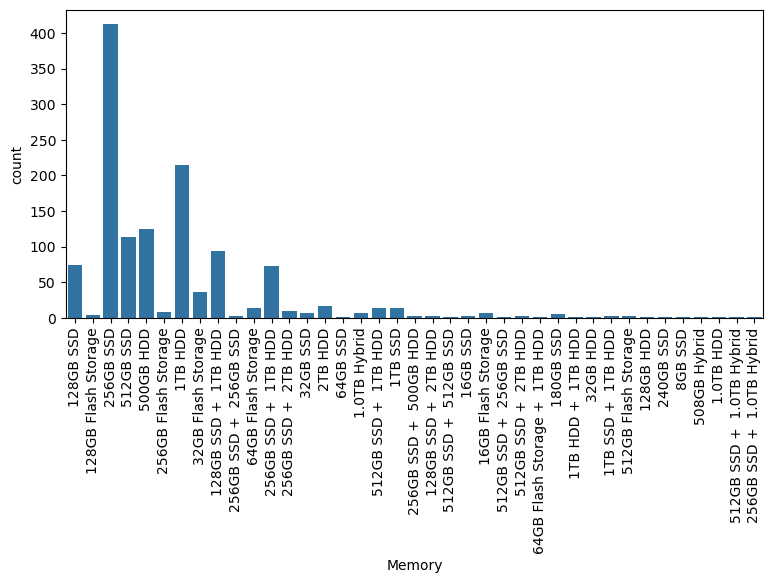

In [22]:
plt.figure(figsize=(9, 4))
sns.countplot(x="Memory", data=df)
plt.xticks(rotation=90)
plt.show()

### 1TB HDD and 256GB SSD are the most common memory types and higher than other types.

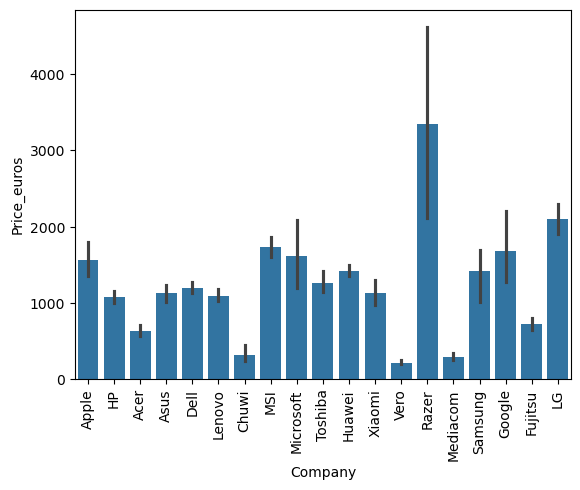

In [23]:
sns.barplot(x = df['Company'], y = df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

###  Razer have the highest average prices compared to other companies. 

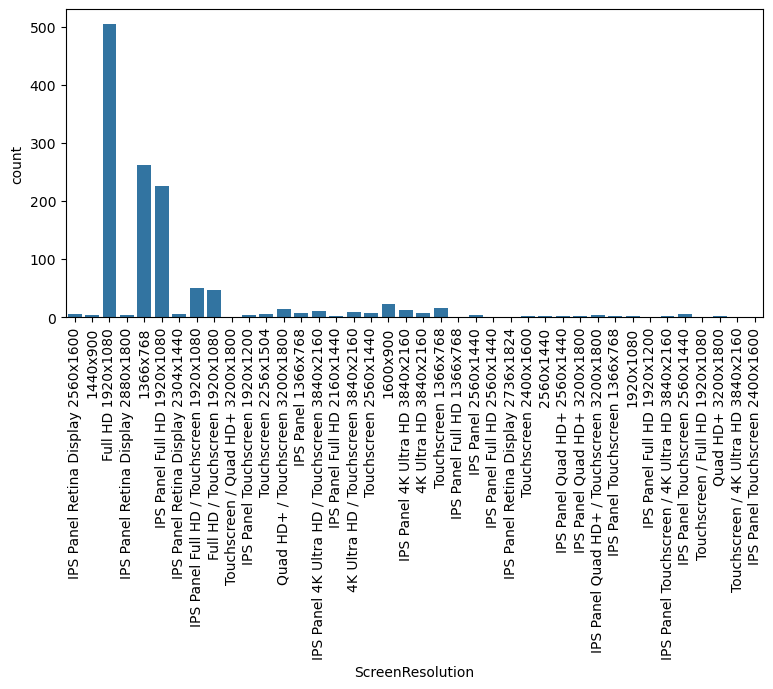

In [24]:
plt.figure(figsize=(9,4))
sns.countplot(x='ScreenResolution', data=df)
plt.xticks(rotation=90)
plt.show()

In [25]:
df["Touchscreen"] = [1 if 'Touchscreen' in i else 0 for i in df["ScreenResolution"]]

In [26]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0


<Axes: xlabel='Touchscreen', ylabel='Price_euros'>

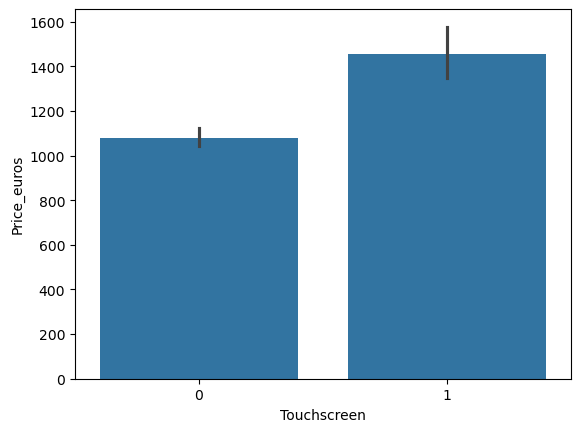

In [27]:
sns.barplot(x=df['Touchscreen'], y = df['Price_euros'])

### IF Touchscreen that make high price 

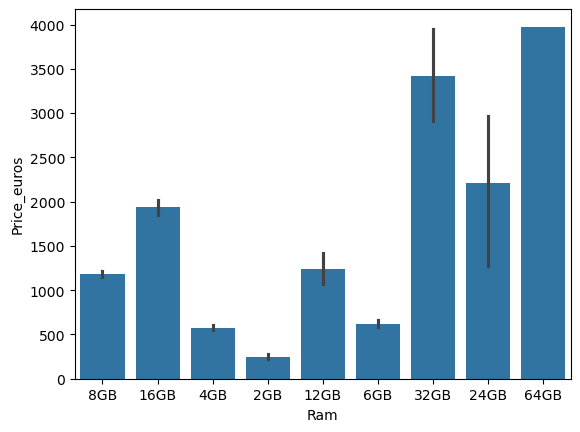

In [28]:
sns.barplot(x = df['Ram'], y = df['Price_euros'])
plt.show() 

#### 64GB of RAM is the most expensive size, costing around €4000.

## Check Outliers

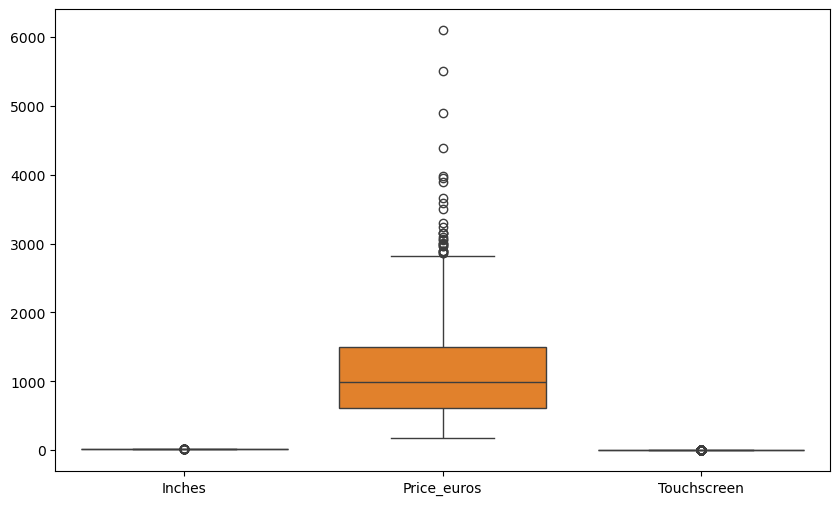

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.show()

<Axes: >

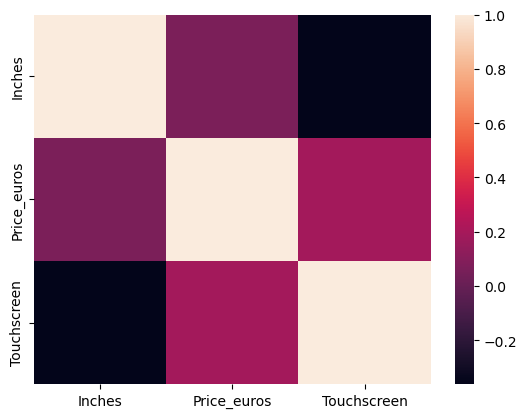

In [30]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix)

##  LabelEncodeing

In [31]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [32]:
cat_features = df.select_dtypes(include=["object","category"]).columns
cat_features

Index(['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')

In [33]:
for col in cat_features:
    df[col] = lb.fit_transform(df[col])

In [34]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen
0,1,300,4,13.3,23,65,8,4,58,8,38,1339.69,0
1,1,301,4,13.3,1,63,8,2,51,8,35,898.94,0
2,7,50,3,15.6,8,74,8,16,53,4,74,575.00,0
3,1,300,4,15.4,25,85,1,29,9,8,71,2537.45,0
4,1,300,4,13.3,23,67,8,16,59,8,38,1803.60,0


In [35]:
# df.drop("Weight" , inplace=True , axis=1)  
#df.drop("Touchscreen" , inplace=True , axis=1) with deop ==> r2 ==> 0.727808

In [36]:
  df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen
0,1,300,4,13.3,23,65,8,4,58,8,38,1339.69,0
1,1,301,4,13.3,1,63,8,2,51,8,35,898.94,0
2,7,50,3,15.6,8,74,8,16,53,4,74,575.00,0
3,1,300,4,15.4,25,85,1,29,9,8,71,2537.45,0
4,1,300,4,13.3,23,67,8,16,59,8,38,1803.60,0


In [37]:
x = df.drop("Price_euros" , axis=1 )
y = df["Price_euros"]

## Split the data to train, test

In [38]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train,y_test = train_test_split(x , y , train_size=0.2, random_state=42 )

## Scale with StanderScaler

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Modeling

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [41]:
model = LinearRegression()

In [42]:
model.fit(x_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(x_test)

In [44]:
mse = mean_squared_error( y_pred , y_test)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 277756.60973107617
R-squared: 0.4472666945061283


## Try another model DecisionTreeRegressor

In [45]:
model2 = DecisionTreeRegressor(random_state=42)
model2.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [46]:
y_pred2 = model2.predict(x_test)

In [47]:
mse = mean_squared_error( y_pred2 , y_test)
r2 = r2_score(y_test, y_pred2)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 239666.4720393137
R-squared: 0.5230657465375768


## Try another model RandomForestRegressor

In [48]:
model3 = RandomForestRegressor(random_state=20)

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {
      "n_estimators":[10 ,20 ,30 , 50 ,70 ,90 ],
    "max_depth":[3 , 5 , 7 , 9 ,11 ]
}
grid_search = GridSearchCV(model3 , param_grid=param_grid)

In [50]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=20),
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'n_estimators': [10, 20, 30, 50, 70, 90]})

In [51]:
print(grid_search.best_params_)

{'max_depth': 11, 'n_estimators': 30}


In [52]:
model3 =RandomForestRegressor(**grid_search.best_params_)
model3.fit(x_train ,y_train)

RandomForestRegressor(max_depth=11, n_estimators=30)

In [53]:
from sklearn.metrics import r2_score
y_pred3 = model3.predict(x_test)
print("R2 score : ", r2_score(y_test , y_pred3))

R2 score :  0.7158063488608497


In [54]:
model4 = grid_search.best_estimator_

In [55]:
y_pred4 = model4.predict(x_test)

In [56]:
print("R2 score : ", r2_score(y_test , y_pred4))

R2 score :  0.7269230515469514


In [57]:
importance = model3.feature_importances_

In [58]:
feature_import = pd.DataFrame({
    "features": x.columns,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)


In [59]:
feature_import

,features,Importance
6,Ram,0.350680
10,Weight,0.205832
5,Cpu,0.105642
1,Product,0.083554
8,Gpu,0.070373
4,ScreenResolution,0.061610
2,TypeName,0.036633
0,Company,0.029589
3,Inches,0.019789
7,Memory,0.016053


## drop columns 

In [64]:
df.drop(["Touchscreen" ,"OpSys"] ,inplace=True , axis=1)

In [65]:
x_new = df.drop("Price_euros" , axis=1 )
y_new = df["Price_euros"]

In [66]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train,y_test = train_test_split(x , y , train_size=0.2, random_state=42 )

In [68]:
new_model = RandomForestRegressor(random_state=20)

In [69]:
from sklearn.model_selection import GridSearchCV
param_grid = {
      "n_estimators":[10 ,20 ,30 , 50 ,70 ,90 ],
    "max_depth":[3 , 5 , 7 , 9 ,11 ]
}
grid_search = GridSearchCV(new_model , param_grid=param_grid)

In [70]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=20),
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'n_estimators': [10, 20, 30, 50, 70, 90]})

In [71]:
print(grid_search.best_params_)

{'max_depth': 11, 'n_estimators': 30}


In [72]:
new_model =RandomForestRegressor(**grid_search.best_params_)
new_model.fit(x_train ,y_train)

RandomForestRegressor(max_depth=11, n_estimators=30)

In [73]:
from sklearn.metrics import r2_score
new_y_pred = new_model.predict(x_test)
print("R2 score : ", r2_score(y_test , new_y_pred))

R2 score :  0.701375788585189


In [74]:
anothermodel = grid_search.best_estimator_

In [75]:
anothermodel_y_pred = anothermodel.predict(x_test)

In [77]:
print("R2 score : ", r2_score(y_test , anothermodel_y_pred))

R2 score :  0.7271082343120853
